In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Leemos la data del titanic
# Sibsp #de hermanos o espaosos abordos
# parch numero de parientes/ hijos abordo
titanic_data = pd.read_csv('train.csv')
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data = pd.read_csv('test.csv')
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
Women = titanic_data.loc[titanic_data.Sex == 'female']["Survived"]
rate_women = sum(Women)/len(Women)
print("% de mujeres quienes sobrivieron:", rate_women)
##______________________________________________________
men = titanic_data.loc[titanic_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% de hombres quienes sobrivieron:", rate_men)

% de mujeres quienes sobrivieron: 0.7420382165605095
% de hombres quienes sobrivieron: 0.18890814558058924


In [9]:
from sklearn.ensemble import RandomForestClassifier

y = titanic_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(titanic_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [11]:
data = pd.read_csv('submission.csv')
total_pasajeros = len(data)
sobrevivieron = data['Survived'].sum()
murieron = total_pasajeros - sobrevivieron

porcentaje_sobrevivieron = (sobrevivieron / total_pasajeros) * 100
porcentaje_murieron = (murieron / total_pasajeros) * 100
print("Porcentaje de sobrevivientes:", porcentaje_sobrevivieron)
print("Porcentaje de fallecidos:", porcentaje_murieron)
print("Cantidad de sobrevivientes:", sobrevivieron)
print("Cantidad de fallecidos:", murieron)

Porcentaje de sobrevivientes: 35.406698564593306
Porcentaje de fallecidos: 64.5933014354067
Cantidad de sobrevivientes: 148
Cantidad de fallecidos: 270


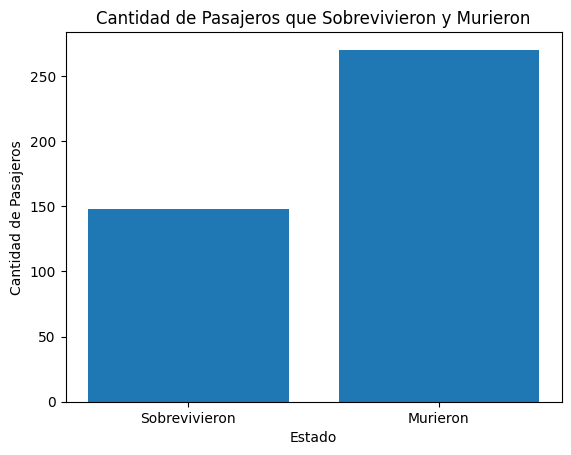

In [13]:
import matplotlib.pyplot as plt

data = pd.read_csv('submission.csv')

sobrevivieron = data['Survived'].sum()
murieron = len(data) - sobrevivieron

# Crear una lista con los datos
cantidad_pasajeros = [sobrevivieron, murieron]
etiquetas = ['Sobrevivieron', 'Murieron']

# Crear el gráfico de barras
plt.bar(etiquetas, cantidad_pasajeros)

# Agregar título y etiquetas a los ejes
plt.title('Cantidad de Pasajeros que Sobrevivieron y Murieron')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Pasajeros')

# Mostrar el gráfico
plt.show()


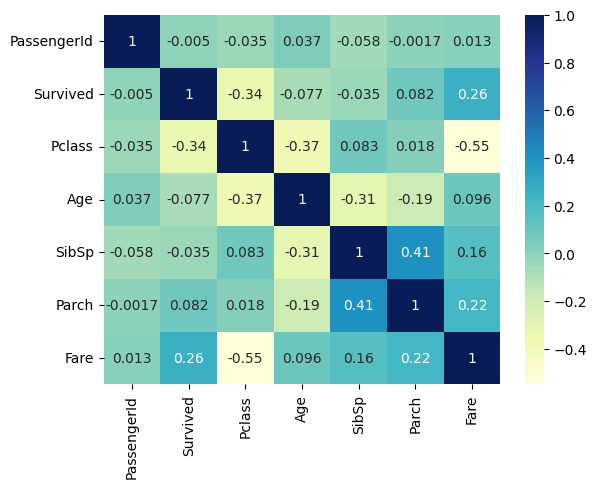

In [10]:
# Seleccionar solo las columnas numéricas
numeric_columns = titanic_data.select_dtypes(include=[float, int])
sns.heatmap(numeric_columns.corr(), annot = True, cmap="YlGnBu")
plt.show()